In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sn
plot_params = {'color': '0.75',
                'style': '.-',
                'markeredgecolor': '0.25',
                'markerfacecolor': '0.25',
                'legend': False}
sn.set_style("dark")
import warnings
warnings.filterwarnings("ignore")

from statsmodels.regression.linear_model import OLS

In [2]:
def rmse(y, y_pred):
    return np.sqrt(((y - y_pred) ** 2).mean())
def mse(y, y_pred):
    return ((y - y_pred) ** 2).mean()
def mae(y, y_pred):
    return ((y - y_pred).abs()).mean()
def mape(y, y_pred):
    return ((y - y_pred).abs() / y).mean() * 100
def evaluate(y, y_pred):
    print("MAE:", mae(y, y_pred))
    #print("MSE:", mse(y, y_pred))
    print("RMSE:", rmse(y, y_pred))
    print("MAPE:", mape(y, y_pred))

# Linear Model

To forecast a trend model, we can simply use a linear regression model where the significance of the slope will indicate if we have a trend, and then we will be able to forecast from the regression line equation

MAE: 34.40554757343553
RMSE: 45.73619391613881
MAPE: 12.319024106792403


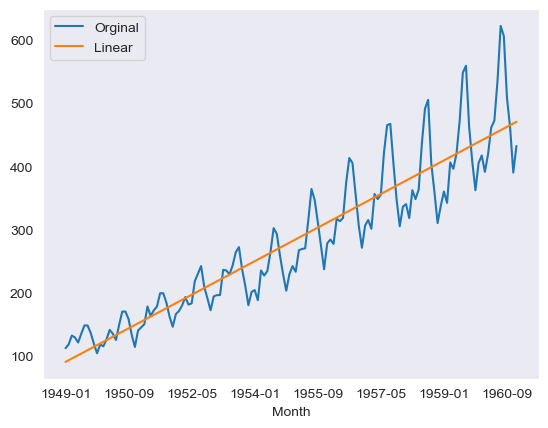

In [12]:
data = pd.read_csv('AirPassengers.csv')
data.set_index('Month', inplace=True)
data['t'] =  np.arange(len(data))
data['intercept'] = 1


lm = OLS(data['#Passengers'], data[['t','intercept']])
model = lm.fit()
data['Linear_forecast'] = model.predict( data[['t','intercept']])

data['#Passengers'].plot()
data['Linear_forecast'].plot()
plt.legend(['Orginal', 'Linear'])

# print evaltion 
evaluate(data['#Passengers'], data['Linear_forecast'])

# Extract Trend Using Decomposition STL and Then Use LR

In [13]:
from statsmodels.tsa.seasonal import STL
stl = STL(data['#Passengers'], period=12)
res = stl.fit()
trend = res.trend
seasonal = res.seasonal
residuals = res.resid

MAE: 34.38847125837027
RMSE: 45.73632072103914
MAPE: 12.309147047489397


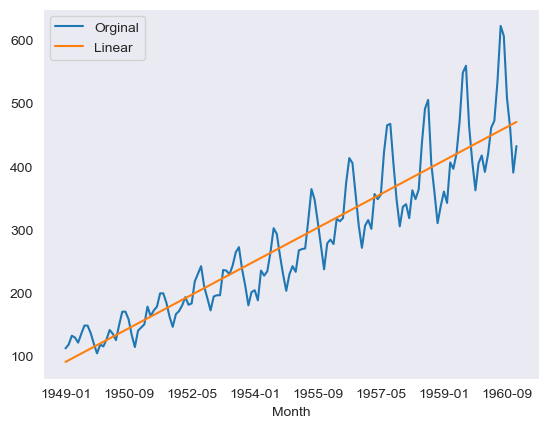

In [15]:
lm = OLS(trend, data[['t','intercept']])
model = lm.fit()
data['Linear_forecast'] = model.predict( data[['t','intercept']])

data['#Passengers'].plot()
data['Linear_forecast'].plot()
plt.legend(['Orginal', 'Linear'])

# print evaltion 
evaluate(data['#Passengers'], data['Linear_forecast'])

In cases where the time series data has a clear trend, one approach that can be used is to extract the trend component from the data using a method like STL (Seasonal and Trend decomposition using Loess), and then fit a linear regression model to the detrended data.

The advantage of this approach is that it allows us to model the trend component separately from any seasonal or cyclic components in the data, which can improve the accuracy of the forecast. By removing the trend component from the data, we can also better identify any remaining patterns, such as seasonality or cyclic behavior, which can be captured by other modeling techniques.

However, it's important to note that this approach assumes that the trend component can be accurately estimated using STL, which may not always be the case. Additionally, other modeling techniques, such as ARIMA or exponential smoothing, may be more appropriate for certain types of time series data, depending on the underlying patterns and characteristics of the data.

In summary, using LR for time series forecasting can be effective when the data has a clear linear trend, but it's important to carefully consider the appropriateness of the model for the specific data and to consider other modeling techniques as well. Using STL to extract the trend component can be a useful approach to separate the trend from other components in the data, but its effectiveness will depend on the specific data and the accuracy of the trend estimation.